# Historical Crude Oil Futures Prices (WTI & Brent)

In [51]:
import numpy as numpy
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


| Variable | Descripción | Rol en el Análisis |
| :--- | :--- | :--- |
| `Date` | La fecha de negociación del contrato de futuros. | **Eje Temporal** |
| `Open` | Precio al inicio de la jornada de negociación. | Feature de Entrada |
| `High` | Precio más alto alcanzado durante el día. | Feature de Entrada |
| `Low` | Precio más bajo alcanzado durante el día. | Feature de Entrada |
| `Close` | Precio de cierre oficial del día. | **Variable Objetivo (Target)** |
| `Volume` | Cantidad total de contratos negociados. | Feature de Entrada (Actividad) |

Futuros (Futures) --> Es un acuerdo para comprar o vender una cantidad específica de petróleo en una fecha futura y a un precio pactado hoy.

In [52]:
brent_prices=pd.read_csv('brent_prices.csv')
brent_prices

,date,open,high,low,close,volume,average
0,2024-04-04,81.44,81.44,81.44,81.44,0.0,81.440
1,2024-04-05,81.60,81.60,81.53,81.53,3.0,81.600
2,2024-04-08,80.90,81.21,80.90,81.21,5.0,80.992
3,2024-04-09,80.81,80.81,80.65,80.67,20.0,80.689
4,2024-04-10,81.26,81.26,81.26,81.26,0.0,81.260
...,...,...,...,...,...,...,...
1835,2018-03-29,57.96,57.96,57.96,57.96,0.0,57.960
1836,2018-04-02,57.11,57.11,57.11,57.11,0.0,57.110
1837,2018-04-03,57.66,57.66,57.66,57.66,0.0,57.660
1838,2018-04-04,57.67,57.67,57.67,57.67,0.0,57.670


In [53]:
brent_prices.isnull().sum()

date       0
open       0
high       0
low        0
close      0
volume     0
average    0
dtype: int64

In [54]:
brent_prices['date']=pd.to_datetime(brent_prices['date'])
brent_prices

,date,open,high,low,close,volume,average
0,2024-04-04,81.44,81.44,81.44,81.44,0.0,81.440
1,2024-04-05,81.60,81.60,81.53,81.53,3.0,81.600
2,2024-04-08,80.90,81.21,80.90,81.21,5.0,80.992
3,2024-04-09,80.81,80.81,80.65,80.67,20.0,80.689
4,2024-04-10,81.26,81.26,81.26,81.26,0.0,81.260
...,...,...,...,...,...,...,...
1835,2018-03-29,57.96,57.96,57.96,57.96,0.0,57.960
1836,2018-04-02,57.11,57.11,57.11,57.11,0.0,57.110
1837,2018-04-03,57.66,57.66,57.66,57.66,0.0,57.660
1838,2018-04-04,57.67,57.67,57.67,57.67,0.0,57.670


In [55]:
brent_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1840 non-null   datetime64[ns]
 1   open     1840 non-null   float64       
 2   high     1840 non-null   float64       
 3   low      1840 non-null   float64       
 4   close    1840 non-null   float64       
 5   volume   1840 non-null   float64       
 6   average  1840 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.8 KB


<Axes: >

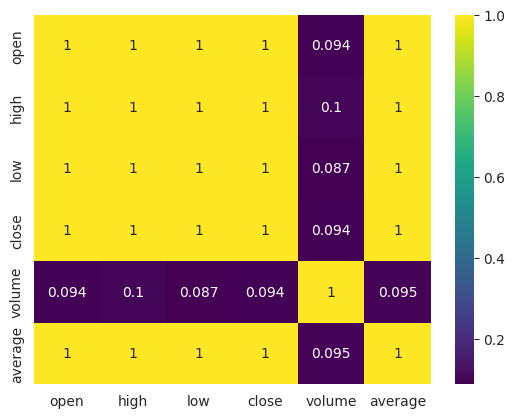

In [56]:
sns.heatmap(data=brent_prices.drop(columns=['date']).corr(), annot=True, cmap='viridis')

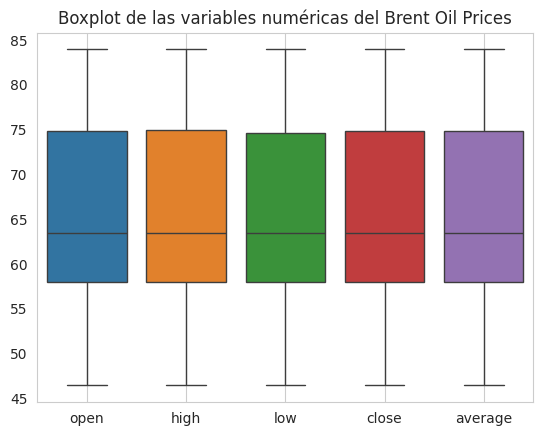

In [57]:
sns.boxplot(data=brent_prices.drop(columns=['volume', 'date']))
plt.title('Boxplot de las variables numéricas del Brent Oil Prices')
plt.grid()
plt.show()

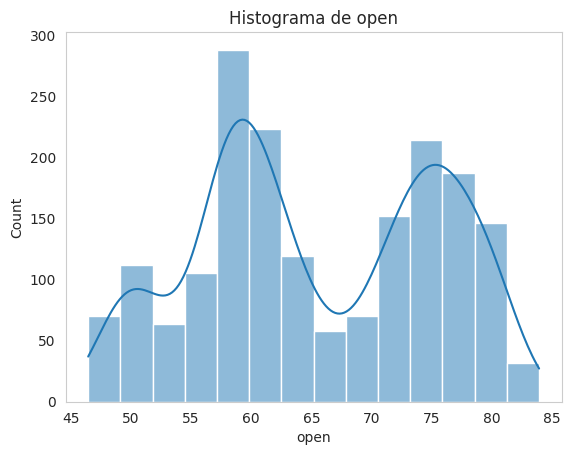

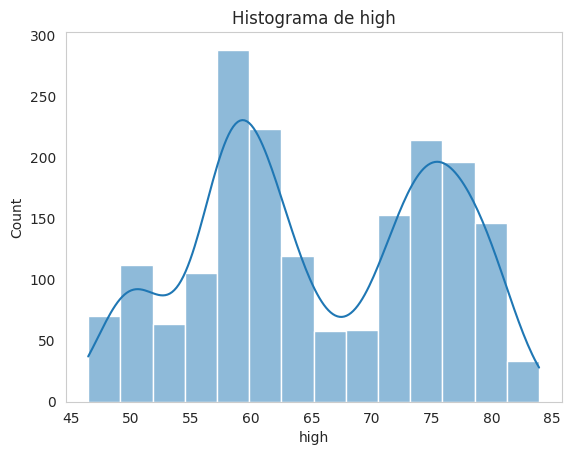

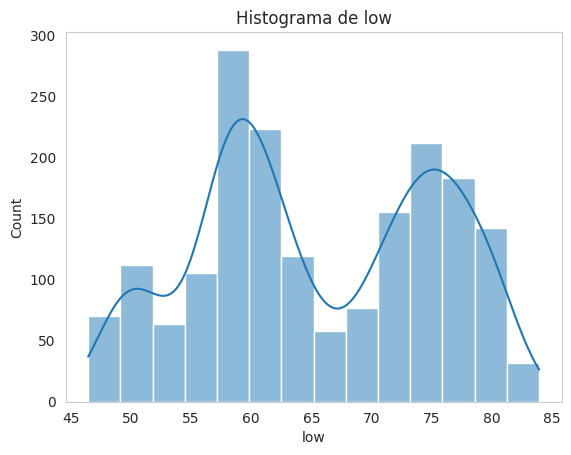

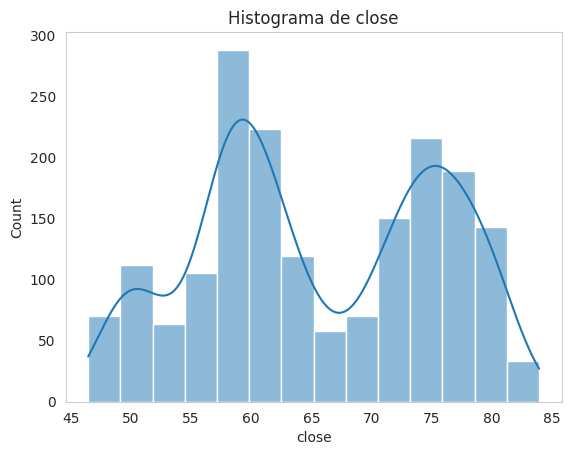

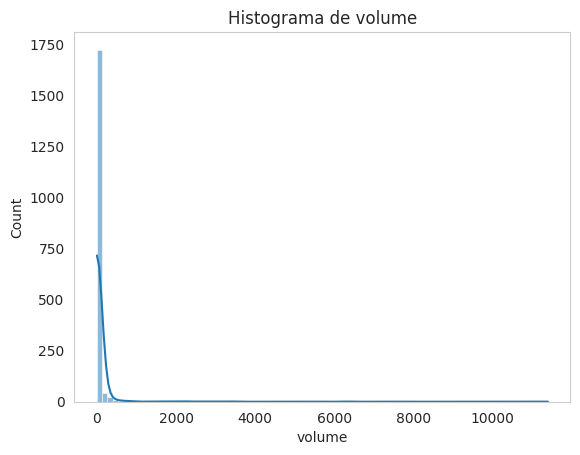

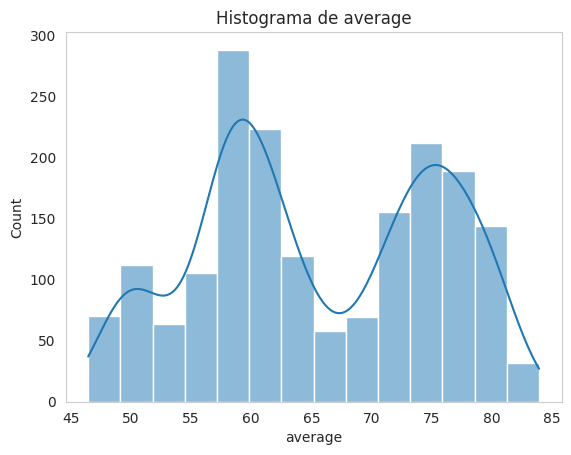

In [58]:
for i in brent_prices.drop(columns=['date']):
    sns.histplot(brent_prices[i], kde=True)
    plt.title(f'Histograma de {i}')
    plt.grid()
    plt.show()

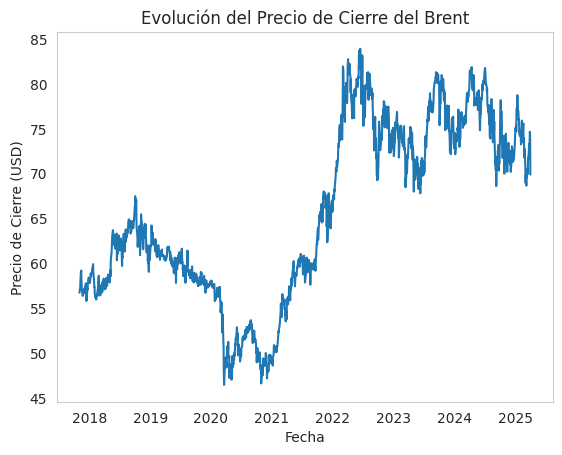

In [59]:
sns.lineplot(x=brent_prices['date'], y=brent_prices['close'], data=brent_prices)
plt.title('Evolución del Precio de Cierre del Brent')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.grid()
plt.show()

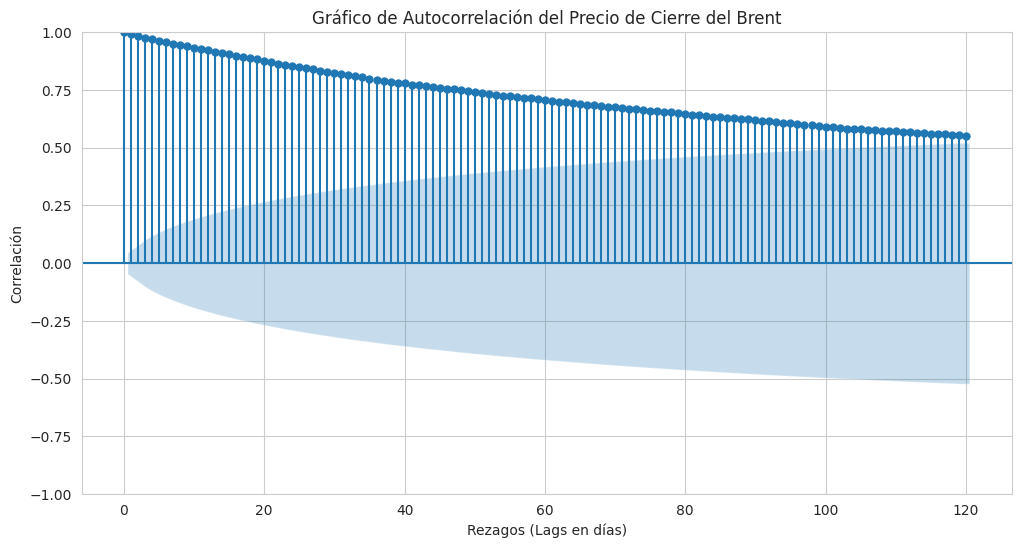

In [60]:
# La fecha será el índice
brent_prices = brent_prices.set_index('date')

# Variable de interés
serie_de_precios = brent_prices['close'].dropna()

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Llama a la función plot_acf
plot_acf(serie_de_precios, lags=120, ax=ax)

plt.title('Gráfico de Autocorrelación del Precio de Cierre del Brent')
plt.xlabel('Rezagos (Lags en días)')
plt.ylabel('Correlación')
plt.show()

In [61]:
Brent_Oil_Prices=pd.read_csv('BrentOilPrices.csv')
Brent_Oil_Prices.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


In [62]:
Brent_Oil_Prices['Date']=pd.to_datetime(Brent_Oil_Prices['Date'])
Brent_Oil_Prices

/tmp/ipykernel_65011/4197264971.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Brent_Oil_Prices['Date']=pd.to_datetime(Brent_Oil_Prices['Date'])


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


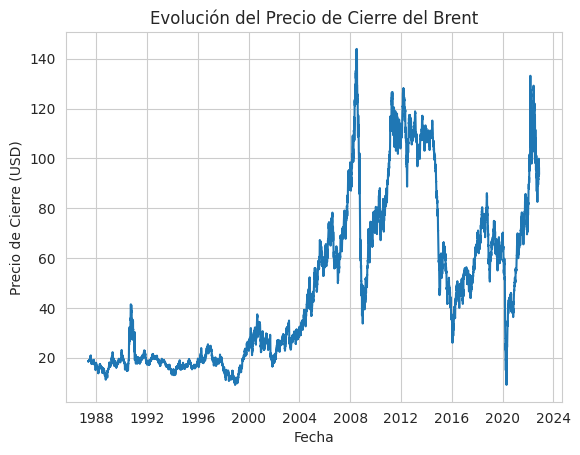

In [63]:
sns.lineplot(x=Brent_Oil_Prices['Date'], y = Brent_Oil_Prices['Price'], data=Brent_Oil_Prices)
plt.title('Evolución del Precio de Cierre del Brent')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.show()

In [64]:
Brent_prices = Brent_Oil_Prices.set_index('Date')
print("Index type:", type(Brent_prices.index))
print("Index dtype:", Brent_prices.index.dtype)
print("Monotonic increasing?:", Brent_prices.index.is_monotonic_increasing)
print("Has duplicates?:", Brent_prices.index.duplicated().any())
print("Sample index entries:", Brent_prices.index[:10])

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index dtype: datetime64[ns]
Monotonic increasing?: True
Has duplicates?: False
Sample index entries: DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26', '1987-05-27', '1987-05-28', '1987-05-29',
               '1987-06-01', '1987-06-02'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [65]:
Brent_prices.index = pd.to_datetime(Brent_prices.index).normalize()
Brent_prices

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [66]:
full_range = pd.date_range(start=Brent_prices.index.min(),
                           end=Brent_prices.index.max(),
                           freq='D')

# Para encontrar las fechas faltantes
missing = full_range.difference(Brent_prices.index)
print("Número de fechas faltantes:", len(missing))
print("Primeras fechas faltantes (hasta 50):\n", missing[:50])

Número de fechas faltantes: 3952
Primeras fechas faltantes (hasta 50):
 DatetimeIndex(['1987-05-23', '1987-05-24', '1987-05-30', '1987-05-31',
               '1987-06-06', '1987-06-07', '1987-06-13', '1987-06-14',
               '1987-06-15', '1987-06-20', '1987-06-21', '1987-06-27',
               '1987-06-28', '1987-07-04', '1987-07-05', '1987-07-11',
               '1987-07-12', '1987-07-18', '1987-07-19', '1987-07-25',
               '1987-07-26', '1987-08-01', '1987-08-02', '1987-08-08',
               '1987-08-09', '1987-08-15', '1987-08-16', '1987-08-22',
               '1987-08-23', '1987-08-29', '1987-08-30', '1987-09-05',
               '1987-09-06', '1987-09-12', '1987-09-13', '1987-09-19',
               '1987-09-20', '1987-09-26', '1987-09-27', '1987-10-03',
               '1987-10-04', '1987-10-10', '1987-10-11', '1987-10-17',
               '1987-10-18', '1987-10-24', '1987-10-25', '1987-10-31',
               '1987-11-01', '1987-11-07'],
              dtype='datetime64[

In [67]:
Brent_prices_full = Brent_prices.reindex(full_range)
Brent_prices_full.index.name = 'Date'

Brent_prices_full

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,NaN
1987-05-24,NaN
...,...
2022-11-10,94.25
2022-11-11,96.37
2022-11-12,NaN


In [68]:
Brent_prices_imputed = Brent_prices_full.interpolate(method='time')
Brent_prices_imputed

,Price
Date,
1987-05-20,18.630000
1987-05-21,18.450000
1987-05-22,18.550000
1987-05-23,18.566667
1987-05-24,18.583333
...,...
2022-11-10,94.250000
2022-11-11,96.370000
2022-11-12,95.443333


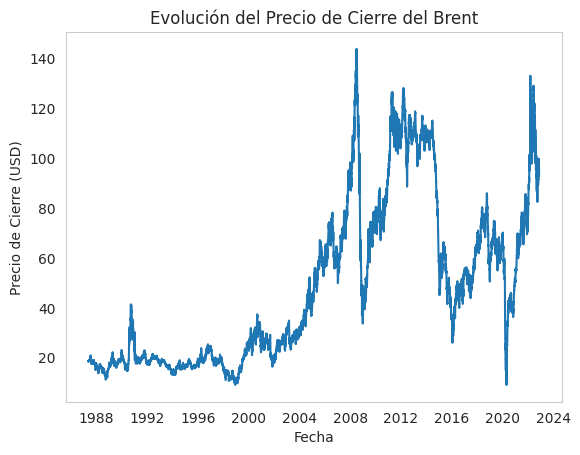

In [69]:
sns.lineplot(x=Brent_prices_imputed.index,
             y=Brent_prices_imputed['Price'])

plt.title('Evolución del Precio de Cierre del Brent')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.grid()
plt.show()

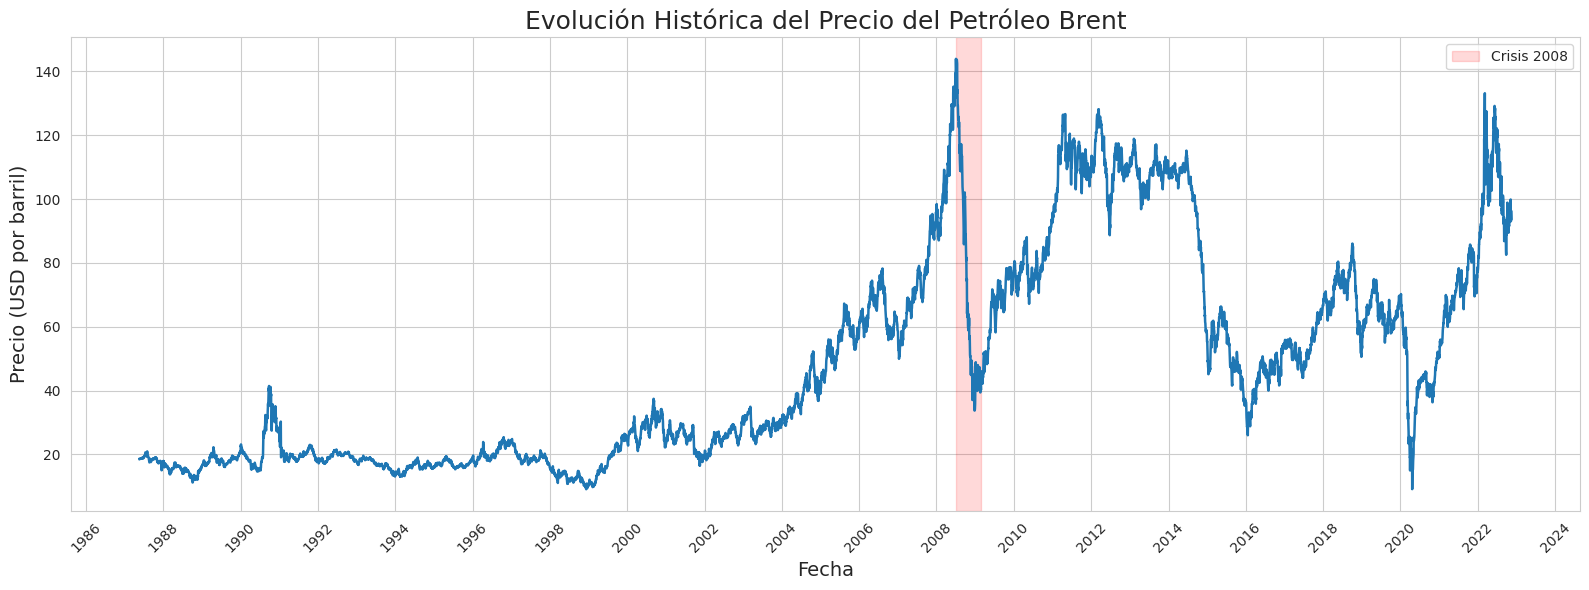

In [70]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))


plt.plot(Brent_prices_imputed.index, 
         Brent_prices_imputed['Price'], 
         linewidth=1.8)

# Crisis Financiera 2008
plt.axvspan(pd.to_datetime("2008-07-01"), 
            pd.to_datetime("2009-03-01"),
            color="red", alpha=0.15, label="Crisis 2008")

plt.title("Evolución Histórica del Precio del Petróleo Brent", fontsize=18)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Precio (USD por barril)", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # cada 2 años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


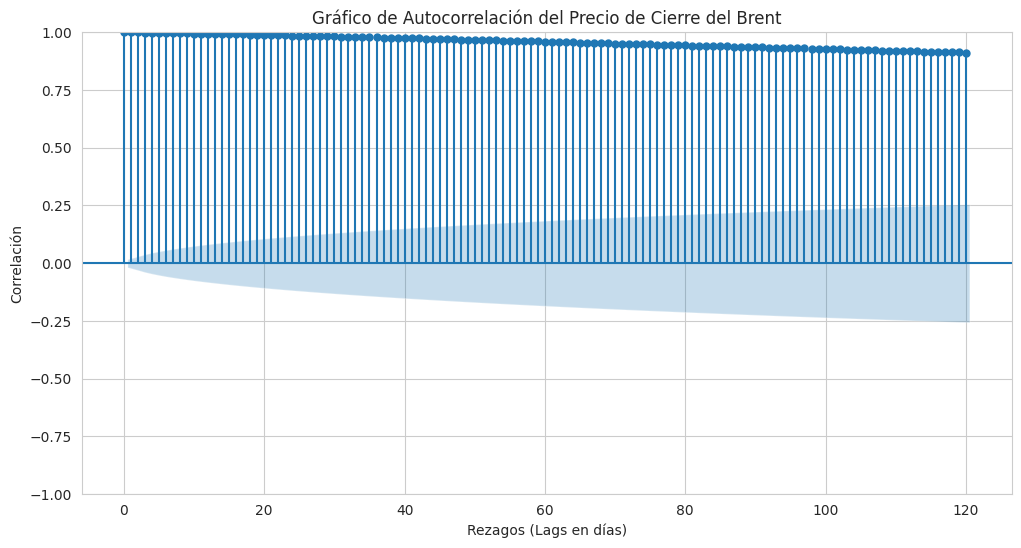

In [71]:
# Variable de interés
serie_de_precios = Brent_prices_imputed['Price']

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Llama a la función plot_acf
plot_acf(serie_de_precios, lags=120, ax=ax)

plt.title('Gráfico de Autocorrelación del Precio de Cierre del Brent')
plt.xlabel('Rezagos (Lags en días)')
plt.ylabel('Correlación')
plt.show()

## WTI

WTI (West Texas Intermediate)-->Es un tipo específico de petróleo crudo, considerado de muy alta calidad

In [72]:
wti_prices=pd.read_csv('wti_prices.csv')
wti_prices

,date,open,high,low,close,volume,average
0,2024-04-04,75.90,76.71,75.44,76.46,4467.0,76.149
1,2024-04-05,76.54,76.91,76.23,76.41,3429.0,76.552
2,2024-04-08,76.57,76.74,75.54,76.18,2276.0,76.070
3,2024-04-09,76.42,76.52,75.48,75.63,1811.0,75.900
4,2024-04-10,76.01,76.48,75.45,76.27,3500.0,76.077
...,...,...,...,...,...,...,...
2076,2017-03-30,54.95,54.95,54.95,54.95,0.0,54.950
2077,2017-03-31,55.44,55.44,55.44,55.44,0.0,55.440
2078,2017-04-03,55.83,55.83,55.83,55.83,0.0,55.830
2079,2017-04-04,56.18,56.18,56.18,56.18,0.0,56.180


In [73]:
wti_prices.isnull().sum()

date       0
open       0
high       0
low        0
close      0
volume     0
average    0
dtype: int64

<Axes: >

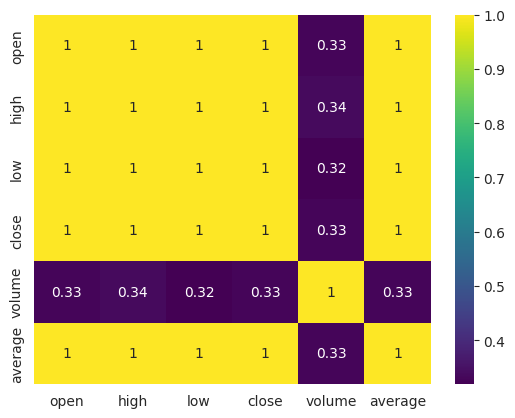

In [74]:
sns.heatmap(data=wti_prices.drop(columns=['date']).corr(), annot=True, cmap='viridis')

<Axes: >

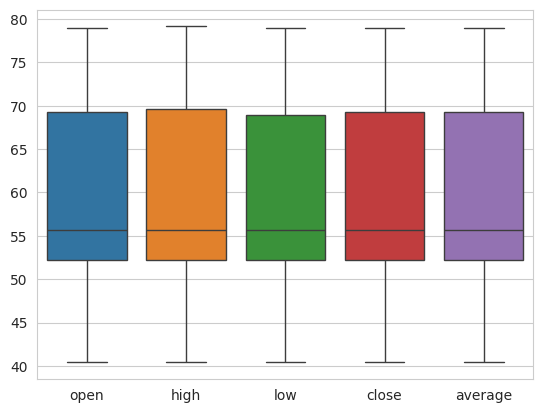

In [75]:
sns.boxplot(data=wti_prices.drop(columns=['volume', 'date']))

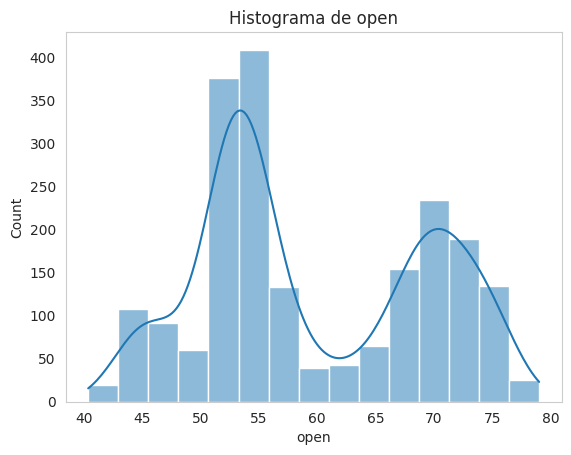

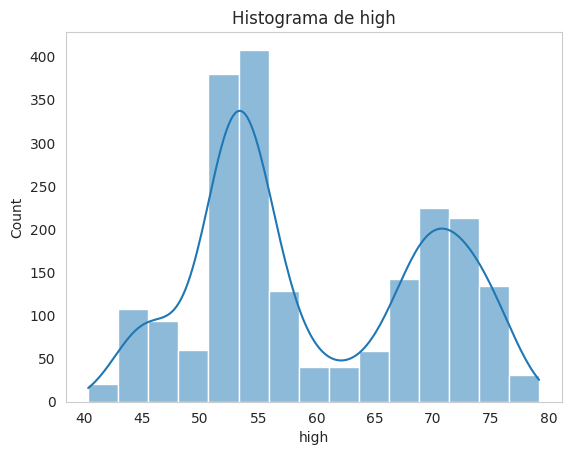

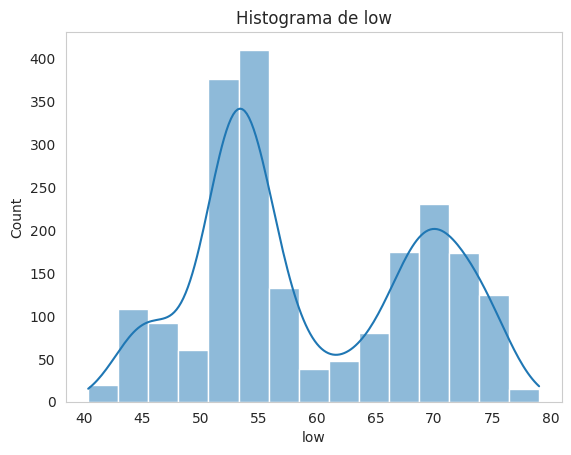

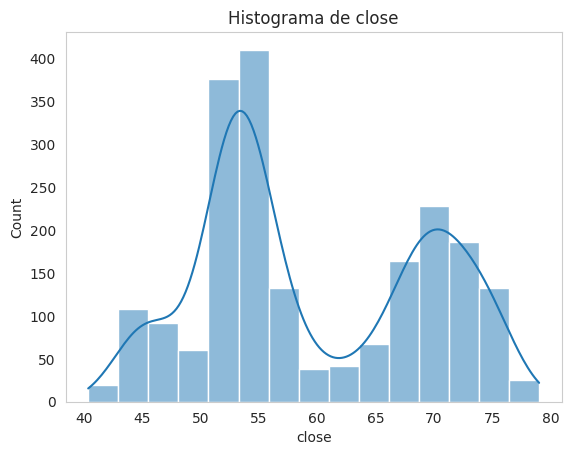

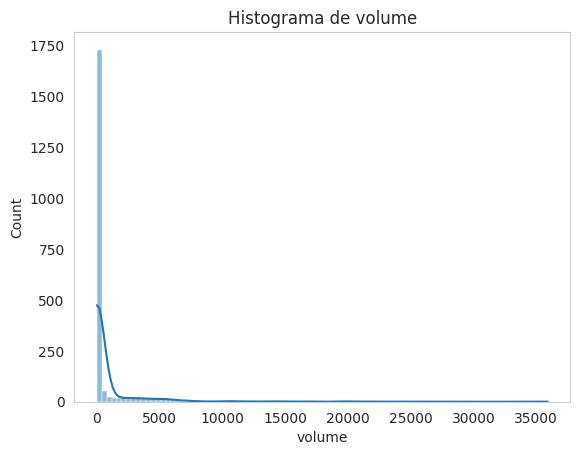

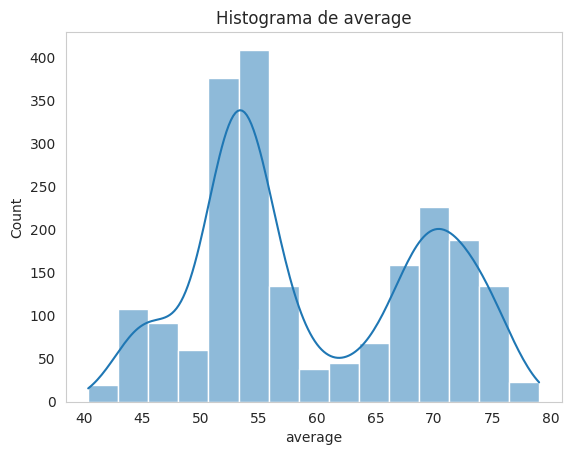

In [76]:
for i in wti_prices.drop(columns=['date']):
    sns.histplot(wti_prices[i], kde=True)
    plt.title(f'Histograma de {i}')
    plt.grid()
    plt.show()

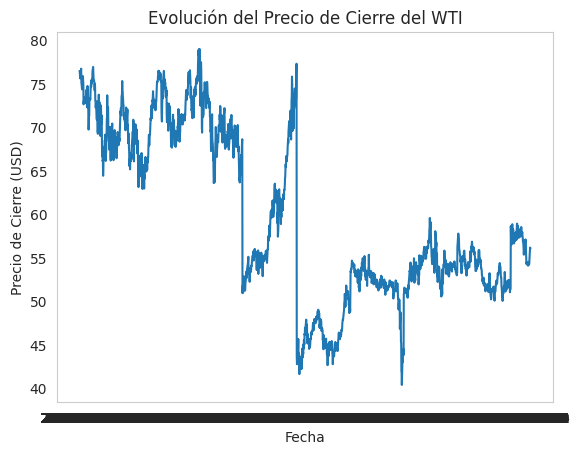

In [77]:
sns.lineplot(x=wti_prices['date'], y=wti_prices['close'], data=wti_prices)
plt.title('Evolución del Precio de Cierre del WTI')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.grid()
plt.show()

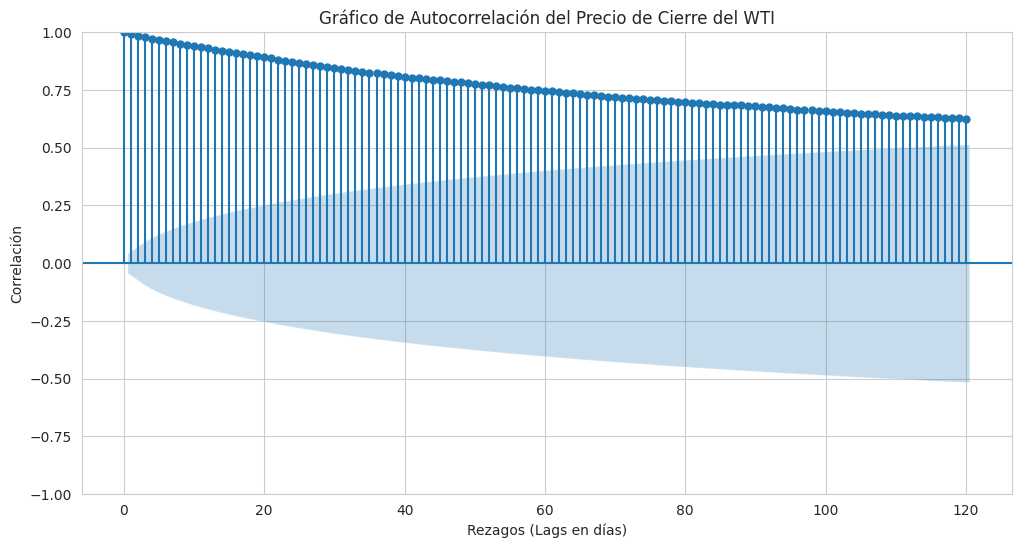

In [78]:
# La fecha será el índice
wti_prices = wti_prices.set_index('date')

# Variable de interés
serie_de_precios = wti_prices['close'].dropna()

# Gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Llama a la función plot_acf
plot_acf(serie_de_precios, lags=120, ax=ax)

plt.title('Gráfico de Autocorrelación del Precio de Cierre del WTI')
plt.xlabel('Rezagos (Lags en días)')
plt.ylabel('Correlación')
plt.show()